# Preprocessing of portal news

- Source: BIGKINDS, the biggest news archive in Korea (https://www.bigkinds.or.kr/)
- Retrieve news data from BIGKINDS
- (A): Browse through the main sections of news
- (B): Apply Korean NLP (natural language processing) tool to the main sections of news
- Repeat (A) and (B)
- Slice the timeline according to the desired time frequency

## (A) Browsing through the main sections of news from BIGKINDS

In [1]:
# Skim through the data of the news
import pandas as pd

raw_data = pd.read_excel(r'data/trade_201709_201805.xlsx')
raw_data

news_date                        news_title  \
0      2017-04-27    [사설] 경기 회복세 떠받칠 실효성 있는 정책 준비해야   
1      2017-04-27  aT-에티오피아 무역대표단, 양국 수출입 활성화 방안 논의   
2      2017-04-27           가정의 달 '아동학대 막는 망고' 공감펀딩   
3      2017-04-27    반도체 건설에 기댄 ‘깜짝 성장’ 소비 서비스업은 냉랭   
4      2017-04-27   간편송금앱 `토스`성공 뒤엔 신보 핀테크 창업지원 있었네   
...           ...                               ...   
20573  2018-05-31  이탈리아發 글로벌 금융시장 휘청 소로스 “위기 임박” 경고   
20574  2018-05-31          중국, 7월부터 소비재 수입 관세 대폭 인하   
20575  2018-05-31     3차 對美 무역협상 앞두고...中, 소비재 관세 인하   
20576  2018-05-31    [사람人사람]동해어업관리단장에 김성희 해수부 기술서기관   
20577  2018-05-31  美 "내달 中제품에 관세폭탄" 휴전 열흘만에 무역전쟁 재개   

                                           news_contents  
0      미국,한은,성장률,회복세,유일호,실효성,사드,무역지수,소비자심리지수,석유화학,상위종...  
1      에티오피아,농식품,대표단,무역부,김동열,아프리카,티베부,하이마놋,한국농수산식품유통공...  
2      펀딩,공정무역,후원자,쿨머니,10만,네이버,생산자,크라우드,아이들,아공,이강백,아공...  
3      반도체,중국,서비스업,기대감,성장률,경제성장률,올겨울,중국인,사드,위기설,관광객,하...  
4      스타트업,핀테크,비바리퍼블리카,수수료,10억,서비스업,네스트,중화권,융복합,캐시멜로...  
...                                                  ...  
20573  이탈리아,유럽,독일,프랑스,유로화,미국,투자자,아시아,소로스,금융위기,재선거,코타렐...  
20574  미국,중국,세탁기,소비재,윌버,국무원,리커창,주방용품,체육용품,상무장관,가전제품,냉...  
20575             중국,미국,세탁기,무역협상,소비재,화장품,제조업,고위급,외국인,리커창  
20576  해수부,김성희,부경대,동해어업관리단장,농림부,김성회,동해,기술서기관,어촌양식정책,서...  
20577  중국,미국,무역전쟁,백악관,미중간,워싱턴,중미,중국인,국무부,다음달,대사관,장도선,...  

[20578 rows x 3 columns]

In [2]:
def remove_comma(x):
    return x.replace(',', ' ')

In [3]:
corpus = raw_data['news_contents'].apply(remove_comma)

In [4]:
temp = []

for i in range(len(corpus)):
    
    a = list(str(corpus[i]).split())
    temp.append(a)
    
temp

[['미국',
  '한은',
  '성장률',
  '회복세',
  '유일호',
  '실효성',
  '사드',
  '무역지수',
  '소비자심리지수',
  '석유화학',
  '상위종목',
  '볼멘',
  '교역량',
  '삼성전자',
  '설비투자',
  '투기성',
  '소비자',
  '6개월',
  '5개월',
  '반도체',
  '성적표'],
 ['에티오피아',
  '농식품',
  '대표단',
  '무역부',
  '김동열',
  '아프리카',
  '티베부',
  '하이마놋',
  '한국농수산식품유통공사',
  '품질관리',
  '수급이사',
  '수출품목',
  '국가들',
  '아두그',
  '광주전남혁',
  '시장다변화',
  '아두',
  '관심사',
  '상호협력',
  '대표부',
  '수출입',
  '양국',
  '방안',
  '일행',
  '수출',
  '촉진'],
 ['펀딩',
  '공정무역',
  '후원자',
  '쿨머니',
  '10만',
  '네이버',
  '생산자',
  '크라우드',
  '아이들',
  '아공',
  '이강백',
  '아공네',
  '머니투데이',
  '공감펀딩',
  '머그컵',
  '수익금',
  '5만',
  '해피빈',
  '농부들',
  '코코넛밀크',
  '카카오닙스',
  '사람들',
  '프레다',
  '백선기'],
 ['반도체',
  '중국',
  '서비스업',
  '기대감',
  '성장률',
  '경제성장률',
  '올겨울',
  '중국인',
  '사드',
  '위기설',
  '관광객',
  '하이투자증권',
  '성태윤',
  '한국',
  '설비투자',
  '박상현',
  '가능성'],
 ['스타트업',
  '핀테크',
  '비바리퍼블리카',
  '수수료',
  '10억',
  '서비스업',
  '네스트',
  '중화권',
  '융복합',
  '캐시멜로',
  '실리콘밸리'],
 ['미국',
  '성장세',
  '반도체',
  '성장률',
  '회복세',
  '한미',
  '건설투자',
  '중

In [5]:
total_tokens = [token for tokens in temp for token in tokens]
print(len(total_tokens))

import nltk
text = nltk.Text(total_tokens, name = 'NMSC')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

393273
50322
[('미국', 12411), ('한국', 8006), ('중국', 7046), ('fta', 3931), ('한미', 3457), ('도널드', 3273), ('자동차', 2802), ('서울', 2419), ('관계자', 2387), ('가능성', 2278)]


In [6]:
set(text.tokens)

{'크라운스탁',
 '도시국가',
 '상위주들',
 '조리기',
 '6권',
 '보증서',
 '재달',
 '사상',
 '관세보복',
 '동결기조',
 '양극',
 '서오',
 '재개발지구',
 '글로벌본부',
 '한국노동연구원',
 '왕강강',
 '문의사항',
 '재정기획관',
 '원유',
 '구리체인',
 '이대중',
 '협상의제',
 '서울글로벌창업센터',
 '유망시장',
 '원나라',
 '로컬서버',
 '직업큐레이터',
 '수석전문위원',
 'top10',
 '제조업자들',
 '탄소강관',
 'bottom',
 '광산업',
 '브랜드',
 '6명의',
 '성장둔화',
 '철조망',
 '이수영',
 '1618억',
 '서약서',
 '안호이저',
 'cbs뉴스',
 '제조전문무역상사',
 '박병국',
 '신통상전략실',
 '우마르',
 '납품단가',
 '이노곤씨',
 '태국어',
 '근시안',
 '구석구석',
 '기급',
 '연강관',
 '안디',
 '신드롬',
 '박남규',
 '직장인',
 '은행납부',
 '아산시',
 '오염물',
 '그사이',
 '도울',
 '교류확대',
 '자가면세한도',
 '송언석',
 '창립총회',
 '전반적',
 '충전지',
 '소염효소제',
 '서류절차',
 '실무팀',
 '노르망디',
 '외부무역',
 '재추대',
 '홍창표',
 '조일훈',
 'adb',
 '푸닝현',
 '감소',
 '수요증가',
 '유통관리',
 '금어기',
 '금융업자',
 '부성장',
 '의약국',
 '방산전시회',
 '상품협정',
 '함석지붕',
 '운반선',
 '해상사',
 '글로벌epc학과',
 '581억',
 '국제물',
 '현대엘리베이터',
 '다이이치생명',
 '잰디브랜즈',
 '578조',
 '금호리조트',
 '웰스매니지먼트',
 '적성검사',
 '수출입기업지원센터',
 '상호적',
 '충주공장',
 '기술교류회의',
 'fierce',
 '평년수익액',
 '사업주',
 '625만',
 '한국자동차',
 '대량인쇄',
 '보조금률',
 '경

In [7]:
len(text.vocab())

50322

In [8]:
# Remove words whose frequencies are ignorable, should you need to finish running Dynamic Topic Model quickly.
# The chosen words are romoved by the process that makes list of stopwords in (B) NLP.
v = dict(text.vocab().most_common()[12000:])
v

{'ebsi': 3,
 '신흥국지수': 3,
 '한국물': 3,
 '원엔': 3,
 '부정행위': 3,
 '화인': 3,
 '버클리': 3,
 '이해당사국': 3,
 '아라비아': 3,
 '주한외국대사관': 3,
 'kb금융': 3,
 '어린아이': 3,
 'kb굿잡': 3,
 '톡톡': 3,
 '은퇴자': 3,
 '귀농귀촌': 3,
 '연령대': 3,
 '스토리텔링': 3,
 '임정환': 3,
 '청라': 3,
 '영종': 3,
 '인스파이어': 3,
 '산업국': 3,
 '에너지업': 3,
 '현지바이어': 3,
 '한국할랄산업연구원': 3,
 '살균시설': 3,
 '100t': 3,
 '화개면': 3,
 '대장균': 3,
 '냉각기': 3,
 '시간당': 3,
 '건축물': 3,
 '장진호': 3,
 '스피드데크': 3,
 '빅게임': 3,
 '청교협': 3,
 '청소년금융교육협의회': 3,
 '긴박감': 3,
 '순발력': 3,
 '팀원들': 3,
 '계좌이체': 3,
 '이유정': 3,
 '플리마켓': 3,
 '유니세프': 3,
 '중동점': 3,
 '고글': 3,
 '반대편': 3,
 '폐파이프': 3,
 '구호물품': 3,
 '재즈트리오': 3,
 '추성웅군': 3,
 '애묘': 3,
 '김영선': 3,
 '구로구': 3,
 '구로': 3,
 'boe': 3,
 '지능형': 3,
 '와이파이': 3,
 '웜비어': 3,
 '2곳': 3,
 '가짜': 3,
 '김영일': 3,
 '한양': 3,
 '접근권': 3,
 '예측': 3,
 '무역특화지수': 3,
 '산시성': 3,
 '고득점': 3,
 '클린룸': 3,
 '세르비아': 3,
 '에스토니아': 3,
 '의료산업': 3,
 '277억': 3,
 '무역입국': 3,
 '파리기후협약': 3,
 '38조': 3,
 '하얼빈': 3,
 '수송선': 3,
 '우방국들': 3,
 '중견기업인': 3,
 '기획과장': 3,
 '교육운영부': 3,
 '박종규': 3,
 '재정기획관': 3,
 '한국조세연구원

In [9]:
v.keys()

dict_keys(['ebsi', '신흥국지수', '한국물', '원엔', '부정행위', '화인', '버클리', '이해당사국', '아라비아', '주한외국대사관', 'kb금융', '어린아이', 'kb굿잡', '톡톡', '은퇴자', '귀농귀촌', '연령대', '스토리텔링', '임정환', '청라', '영종', '인스파이어', '산업국', '에너지업', '현지바이어', '한국할랄산업연구원', '살균시설', '100t', '화개면', '대장균', '냉각기', '시간당', '건축물', '장진호', '스피드데크', '빅게임', '청교협', '청소년금융교육협의회', '긴박감', '순발력', '팀원들', '계좌이체', '이유정', '플리마켓', '유니세프', '중동점', '고글', '반대편', '폐파이프', '구호물품', '재즈트리오', '추성웅군', '애묘', '김영선', '구로구', '구로', 'boe', '지능형', '와이파이', '웜비어', '2곳', '가짜', '김영일', '한양', '접근권', '예측', '무역특화지수', '산시성', '고득점', '클린룸', '세르비아', '에스토니아', '의료산업', '277억', '무역입국', '파리기후협약', '38조', '하얼빈', '수송선', '우방국들', '중견기업인', '기획과장', '교육운영부', '박종규', '재정기획관', '한국조세연구원', '라보뱅크', 'chain', '양자택일', '광신도', '세르게이', 'space', '실업난', '이중고', 'it업계', '김유진', '도화선', '가족부', '여성가족부', '콜카타', '미래산업', '가전시장', '언더아머', '논산', '항공사들', '브리티시', '예측가능', '실수', '국제거래', '위험관리', '준법감시', '금명간', '맞춤식', '50건', '서비스부', '농업농촌', 'gap', '5인', '수산중공업', '법조계', '병행수입', '가품', '다자협정', '39억', '위조상품', 'ecck', '주한유럽상공회의소', '본계약', '공동개

In [10]:
p = list(v.keys())
p

['ebsi',
 '신흥국지수',
 '한국물',
 '원엔',
 '부정행위',
 '화인',
 '버클리',
 '이해당사국',
 '아라비아',
 '주한외국대사관',
 'kb금융',
 '어린아이',
 'kb굿잡',
 '톡톡',
 '은퇴자',
 '귀농귀촌',
 '연령대',
 '스토리텔링',
 '임정환',
 '청라',
 '영종',
 '인스파이어',
 '산업국',
 '에너지업',
 '현지바이어',
 '한국할랄산업연구원',
 '살균시설',
 '100t',
 '화개면',
 '대장균',
 '냉각기',
 '시간당',
 '건축물',
 '장진호',
 '스피드데크',
 '빅게임',
 '청교협',
 '청소년금융교육협의회',
 '긴박감',
 '순발력',
 '팀원들',
 '계좌이체',
 '이유정',
 '플리마켓',
 '유니세프',
 '중동점',
 '고글',
 '반대편',
 '폐파이프',
 '구호물품',
 '재즈트리오',
 '추성웅군',
 '애묘',
 '김영선',
 '구로구',
 '구로',
 'boe',
 '지능형',
 '와이파이',
 '웜비어',
 '2곳',
 '가짜',
 '김영일',
 '한양',
 '접근권',
 '예측',
 '무역특화지수',
 '산시성',
 '고득점',
 '클린룸',
 '세르비아',
 '에스토니아',
 '의료산업',
 '277억',
 '무역입국',
 '파리기후협약',
 '38조',
 '하얼빈',
 '수송선',
 '우방국들',
 '중견기업인',
 '기획과장',
 '교육운영부',
 '박종규',
 '재정기획관',
 '한국조세연구원',
 '라보뱅크',
 'chain',
 '양자택일',
 '광신도',
 '세르게이',
 'space',
 '실업난',
 '이중고',
 'it업계',
 '김유진',
 '도화선',
 '가족부',
 '여성가족부',
 '콜카타',
 '미래산업',
 '가전시장',
 '언더아머',
 '논산',
 '항공사들',
 '브리티시',
 '예측가능',
 '실수',
 '국제거래',
 '위험관리',
 '준법감시',
 '금명간',
 '맞춤식',
 '50건',
 '서비스부',
 '

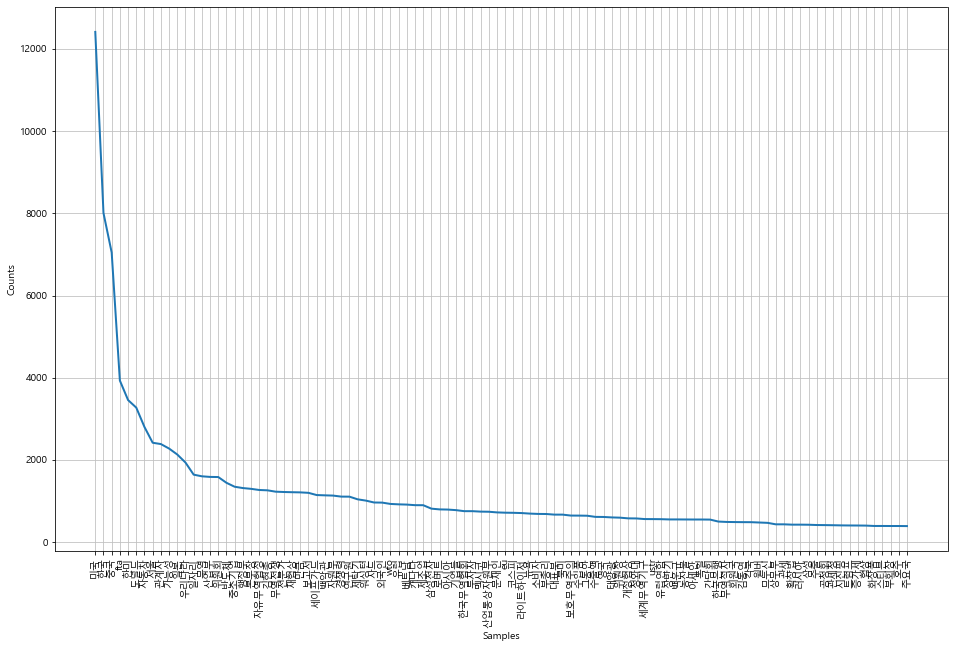

In [11]:
# Checking the frequency of each word
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Linux':
    path = '/usr/share/fonts/truetype/malgun/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize = (16, 10))
text.plot(100)

## (B) NLP (Natural Language Processing)

In [12]:
# Loading the stopwords list
import string

def define_stopwords(path):
    
    SW = set()
    # Users can add other stopwords they want.
    # SW.add("회사")
   
    # Use punctuation to add special characters
    for i in string.punctuation:
        SW.add(i)
    
    # For Python 3, the files must be encoded as ANSI to be loaded.
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

SW = define_stopwords(r'data/stopwords-ko.txt')

for w in range(0,len(p)):
    
    SW.add(p[w])

SW

{'도시국가',
 '상위주들',
 '조리기',
 '6권',
 '보증서',
 '재달',
 '관세보복',
 '동결기조',
 '양극',
 '서오',
 '재개발지구',
 '글로벌본부',
 '왕강강',
 '재정기획관',
 '이대중',
 '협상의제',
 '서울글로벌창업센터',
 '원나라',
 '로컬서버',
 '직업큐레이터',
 '수석전문위원',
 'top10',
 '탄소강관',
 'bottom',
 '광산업',
 '6명의',
 '성장둔화',
 '1618억',
 '서약서',
 '납품단가',
 'cbs뉴스',
 '제조전문무역상사',
 '박병국',
 '우마르',
 '이노곤씨',
 '태국어',
 '근시안',
 '구석구석',
 '기급',
 '연강관',
 '안디',
 '신드롬',
 '박남규',
 '하지마\n',
 '은행납부',
 '도울',
 '오염물',
 '자가면세한도',
 '송언석',
 '창립총회',
 '충전지',
 '소염효소제',
 '노르망디',
 '외부무역',
 '재추대',
 '조일훈',
 '푸닝현',
 '수요증가',
 '유통관리',
 '금융업자',
 '부성장',
 '의약국',
 '방산전시회',
 '상품협정',
 '함석지붕',
 '해상사',
 '글로벌epc학과',
 '581억',
 '현대엘리베이터',
 '다이이치생명',
 '578조',
 '잰디브랜즈',
 '웰스매니지먼트',
 '금호리조트',
 '적성검사',
 '수출입기업지원센터',
 '충주공장',
 '기술교류회의',
 'fierce',
 '평년수익액',
 '한국자동차',
 '625만',
 '대량인쇄',
 '보조금률',
 '경리실무사무원',
 '망연자실',
 '사무용품',
 '처사',
 '83건',
 'title',
 '전체수석',
 '대출한도',
 '200t',
 '온라인사전등록',
 '100bp',
 '영업기반',
 '사라마위크라마',
 '주정수',
 'saint',
 '160조',
 '수출장벽',
 '1061억',
 '국민차',
 '1900억',
 '아담스',
 '지표시',
 '유트레이드',
 '제빵업계',
 '582억'

In [13]:
# I wrote the codes below in Amazon web serveces EC2, which uses Ubunto OS based on the Linux kernel.
# If you use different OS, please change some lines, especially regarding mecab and konlpy, in order for them to be excecuted.
# Preparing Tokenizing (installing konlpy, mecab)
# konlpy is a Korean NLP library that includes mecab, Kkma, Hannanum, Okt, Komoran.
# Use mecab because it excels in speed and accuracy compared to other NLP tools.
!pip install tqdm
!pip install git+https://github.com/e9t/konlpy.git
!bash mecab.sh

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
  Cloning https://github.com/e9t/konlpy.git to /tmp/pip-req-build-nzpxl7hl
  Running command git clone -q https://github.com/e9t/konlpy.git /tmp/pip-req-build-nzpxl7hl
  Running command git submodule update --init --recursive -q
  Created wheel for konlpy: filename=konlpy-0.5.2.dev0-py2.py3-none-any.whl size=19443480 sha256=9f5c6cd0978fe05019342ee7f5ada0e823ebc013060f006dd18675c83086e0bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-yb90hfr_/wheels/2f/e2/56/ec84cc452d8fc154e010cacd885479828a1041ff227a1166e3
Successfully built konlpy
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [14]:
# Running mecab
# For Windows users, from konlpy.tag import MeCab (Mind the upper and lower case letters.)
# For Linux or Mac OS users, from konlpy.tag import Mecab (Mind the upper and lower case letters.)
from konlpy.tag import Mecab

# For Windows users, mecab = MeCab.Tagger()
# Linux or Mac OS users, mecab = Mecab() 
mecab = Mecab()

from tqdm import tqdm_notebook # progress bar

In [15]:
# Tokeinizing texts
tokenized_text = [mecab.nouns(temp2) for temp2 in corpus] # tokenizer= "noun" or "morph" or "word"
tokenized_text = [item for item in tokenized_text]
print (tokenized_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
# Removing stopwords
tokenized_text = [[word for word in contents if word not in SW and len(word) > 1]for contents in tokenized_text]
print(tokenized_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
tokenized_text

[['미국',
  '성장',
  '회복세',
  '유일호',
  '실효성',
  '사드',
  '무역',
  '지수',
  '소비자',
  '심리',
  '지수',
  '석유',
  '화학',
  '상위',
  '종목',
  '교역',
  '삼성전자',
  '설비',
  '투자',
  '소비자',
  '개월',
  '개월',
  '반도체',
  '성적표'],
 ['에티오피아',
  '식품',
  '대표단',
  '무역',
  '아프리카',
  '이마',
  '한국',
  '농수산',
  '식품',
  '유통',
  '공사',
  '품질',
  '관리',
  '이사',
  '수출',
  '품목',
  '국가',
  '광주',
  '전남',
  '시장',
  '관심사',
  '상호',
  '협력',
  '대표부',
  '수출입',
  '양국',
  '방안',
  '수출',
  '촉진'],
 ['펀딩',
  '공정',
  '무역',
  '후원자',
  '머니',
  '네이버',
  '생산자',
  '우드',
  '아이',
  '이강백',
  '머니',
  '펀딩',
  '머그',
  '수익금',
  '해피',
  '농부',
  '밀크',
  '카카오',
  '사람',
  '백선기'],
 ['반도체',
  '중국',
  '서비스업',
  '기대감',
  '성장',
  '경제',
  '성장',
  '중국인',
  '사드',
  '기설',
  '관광객',
  '하이',
  '투자',
  '증권',
  '성태윤',
  '한국',
  '설비',
  '투자',
  '박상현',
  '가능'],
 ['스타트업', '테크', '비바리', '퍼블', '리카', '수수료', '서비스업', '캐시', '실리콘밸리'],
 ['미국',
  '성장세',
  '반도체',
  '성장',
  '회복세',
  '건설',
  '투자',
  '중국',
  '설비',
  '투자',
  '증가세',
  '사드',
  '수출액',
  '민간',
  '소비',
  '제조업',
  '국행',
  '두언'],
 

In [18]:
# Browsing through the tokens of the main sections of news after NLP
total_tokens_nlp = [token for tokens in tokenized_text for token in tokens]
print(len(total_tokens_nlp))

text_nlp = nltk.Text(total_tokens_nlp, name = 'NMSC')
print(len(set(text_nlp.tokens)))
print(text_nlp.vocab().most_common(10))

410037
11787
[('미국', 13337), ('무역', 12793), ('한국', 10691), ('중국', 7782), ('산업', 4351), ('경제', 3732), ('기업', 3376), ('도널드', 3278), ('자동차', 3271), ('통상', 3213)]


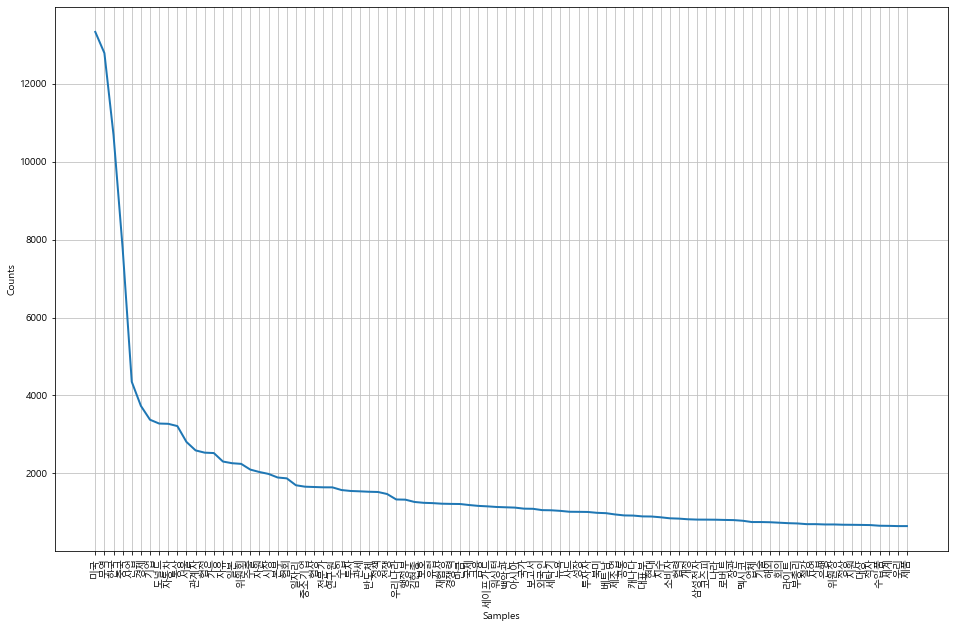

In [19]:
# Checking the frequency of each word after NLP
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Linux':
    path = '/usr/share/fonts/truetype/malgun/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize = (16, 10))
text_nlp.plot(90)

## Slicing the timeline according to the desired time frequency

In [20]:
# Replacing the previous contents column with the processed tokens using NLP
temp2 = pd.Series(tokenized_text)
raw_data["contents"] = temp2
data = raw_data[raw_data["contents"] != ""]
data.reset_index(drop = True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20578 entries, 0 to 20577
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_date      20578 non-null  object
 1   news_title     20578 non-null  object
 2   news_contents  20578 non-null  object
 3   contents       20578 non-null  object
dtypes: object(4)
memory usage: 643.2+ KB


In [21]:
data.head()

news_date                        news_title  \
0  2017-04-27    [사설] 경기 회복세 떠받칠 실효성 있는 정책 준비해야   
1  2017-04-27  aT-에티오피아 무역대표단, 양국 수출입 활성화 방안 논의   
2  2017-04-27           가정의 달 '아동학대 막는 망고' 공감펀딩   
3  2017-04-27    반도체 건설에 기댄 ‘깜짝 성장’ 소비 서비스업은 냉랭   
4  2017-04-27   간편송금앱 `토스`성공 뒤엔 신보 핀테크 창업지원 있었네   

                                       news_contents  \
0  미국,한은,성장률,회복세,유일호,실효성,사드,무역지수,소비자심리지수,석유화학,상위종...   
1  에티오피아,농식품,대표단,무역부,김동열,아프리카,티베부,하이마놋,한국농수산식품유통공...   
2  펀딩,공정무역,후원자,쿨머니,10만,네이버,생산자,크라우드,아이들,아공,이강백,아공...   
3  반도체,중국,서비스업,기대감,성장률,경제성장률,올겨울,중국인,사드,위기설,관광객,하...   
4  스타트업,핀테크,비바리퍼블리카,수수료,10억,서비스업,네스트,중화권,융복합,캐시멜로...   

                                            contents  
0  [미국, 성장, 회복세, 유일호, 실효성, 사드, 무역, 지수, 소비자, 심리, 지...  
1  [에티오피아, 식품, 대표단, 무역, 아프리카, 이마, 한국, 농수산, 식품, 유통...  
2  [펀딩, 공정, 무역, 후원자, 머니, 네이버, 생산자, 우드, 아이, 이강백, 머...  
3  [반도체, 중국, 서비스업, 기대감, 성장, 경제, 성장, 중국인, 사드, 기설, ...  
4      [스타트업, 테크, 비바리, 퍼블, 리카, 수수료, 서비스업, 캐시, 실리콘밸리]

In [22]:
# Setting the "news_date" data to be reconized as time
import numpy as np
data['date'] = pd.to_datetime(data['news_date'])

# Appoint "date" that has been recognized as time in Python to be the index.
data['index'] = data['date']

In [23]:
data = data[['index', 'date', 'news_title', 'contents']]

In [24]:
data = data.set_index('index')

In [25]:
# Weekly or Monthly grouping
# To group by week, grouped_date = data.groupby([(data.index.year), (data.index.week)])['date'].apply(list)
# To group by month, grouped_date = data.groupby([(data.index.year), (data.index.month)])['date'].apply(list)
grouped_date = data.groupby([(data.index.year), (data.index.week)])['date'].apply(list)
grouped_date

index  index
2017   17       [2017-04-27 00:00:00, 2017-04-27 00:00:00, 201...
       18       [2017-05-01 00:00:00, 2017-05-01 00:00:00, 201...
       19       [2017-05-08 00:00:00, 2017-05-08 00:00:00, 201...
       20       [2017-05-15 00:00:00, 2017-05-15 00:00:00, 201...
       21       [2017-05-22 00:00:00, 2017-05-22 00:00:00, 201...
       22       [2017-05-29 00:00:00, 2017-05-29 00:00:00, 201...
       23       [2017-06-05 00:00:00, 2017-06-05 00:00:00, 201...
       24       [2017-06-12 00:00:00, 2017-06-12 00:00:00, 201...
       25       [2017-06-19 00:00:00, 2017-06-19 00:00:00, 201...
       26       [2017-06-26 00:00:00, 2017-06-26 00:00:00, 201...
       27       [2017-07-03 00:00:00, 2017-07-03 00:00:00, 201...
       28       [2017-07-10 00:00:00, 2017-07-10 00:00:00, 201...
       29       [2017-07-17 00:00:00, 2017-07-17 00:00:00, 201...
       30       [2017-07-24 00:00:00, 2017-07-24 00:00:00, 201...
       31       [2017-07-31 00:00:00, 2017-07-31 00:00:00, 201.

In [26]:
# Check the years of the grouped data
grouped_date.index.get_level_values(0)

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            2018, 2018, 2018],
           dtype='int64', name='index')

In [27]:
grouped_date.index.get_level_values(1)

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
            16, 17, 18, 19, 20, 21, 22],
           dtype='int64', name='index')

In [28]:
# If you want to indicate each week as its last date, then replace '[i][0]' below with '[i][-1]'.
grouped_date_2 = []

for j in range(19, 36):
    
    a = grouped_date.iloc[grouped_date.index.get_level_values(0) == 2017][j]
    grouped_date_2.append(a)

for l in range(0, 14):
    
    a = grouped_date.iloc[grouped_date.index.get_level_values(0) == 2018][l][0]
    grouped_date_2.append(a)    
    
print(grouped_date_2)

[[Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2

In [29]:
# news title weekly or monthly grouping
grouped_title = data.groupby([(data.index.year), (data.index.week)])['news_title'].apply(list)

# Carry out grouped_title_2 as grouped_date_2. Caution: Remove [0] following [i].
grouped_title_2 = []

for j in range(19, 36):
    
    a = grouped_title.iloc[grouped_title.index.get_level_values(0) == 2017][j]
    grouped_title_2.append(a)        

for l in range(0, 14):
    
    a = grouped_title.iloc[grouped_title.index.get_level_values(0) == 2018][l]
    grouped_title_2.append(a)            
    
print(grouped_title_2)

[['현대ㆍ기아, 中진출 협력업체 2500억 선지급', '대외경제정책연구원 “한미FTA 폐기하면 미국 손실 더 클 것”', '한 미 FTA 종료시 대미 흑자 2.6억불↑ "미국이 더 손해"', '무역협회 "트럼프 한미 FTA 폐기 발언에 깊은 우려"', '[시황종합]코스피 北 리스크에 1% 급락... 2320대 후퇴', "위기의 국산車 업계 CEO 총출동..'통상임금+사드+파업' 해법논의", "코스피, 北 리스크에 2330대로 밀려... 외인 '사자'", '산업부 "北 핵실험 상황 엄중, 필요시 신속한 조치 취할 것"', '[오늘의시선] ‘한 미 FTA 위기’ 적극적인 대응 필요하다', '산업부 코트라, 인도네시아 자카르타 한류박람회 개최', '[WT논평] Germany’s sense of superiority', '[오늘의포인트]北 리스크 확대 vs 맷집 키운 코스피', '美, 한국에 농산물 관세 즉시 철폐 요구', '미국 “우리 농산물 관세 철폐를 한국산엔 10년 더”', '한미 FTA 폐기 준비 지시? “모든 가능성 대비”', '산업계 “한 미FTA 폐기되나” 전전긍긍', '6차 북핵 실험 美 FTA 폐기 위협 첩첩산중 한국경제', '미국, FTA 개정 협상서 "농산물 관세 즉시철폐" 요구', '[사설] 북핵 리스크 실물경제 전이 안되게 만전 기해야', '[아주초대석]\'문재인 케어\' 보험산업에 새로운 기회..."정부도 포지티브 자세 필요"', "美 8월 '서울 FTA공동위'서 농산물 관세 철폐 요구했었다", "'내우외환'에 발목 잡힌 한국경제 소프트패치(일시적 침체)우려 목소리", '\u200b한미FTA 폐기 때 5년간 최대 수출 30조원-일자리 24만개 증발', '북핵 리스크 \'최고조\' 정부 "금융시장 24시간 모니터링"', '"한미 FTA 종료 시 미국 타격 더 커 韓 대미 무역수지 흑자 2.6억불 ↑"', "\u200b[이슈분석]핵폭탄 맞은 'J노믹스’ 컨틴전시 플랜(비상계획) 짜라", '북핵실험까지 사면초가 한국경제', '[TOPIC] `글

In [30]:
# news contents weekly or monthly grouping
grouped_contents = data.groupby([(data.index.year), (data.index.week)])['contents'].apply(list)

# Carry out grouped_contents_2 as grouped_date_2. Caution: Remove [0] following [i].
grouped_contents_2 = []

for j in range(19, 36):
    
    a = grouped_contents.iloc[grouped_contents.index.get_level_values(0) == 2017][j]
    grouped_contents_2.append(a)        

for l in range(0, 14):
    
    a = grouped_contents.iloc[grouped_contents.index.get_level_values(0) == 2018][l]
    grouped_contents_2.append(a)           
    
print(grouped_contents_2)

[[['투자', '간담회', '한국', '백운규', '협력', '업체', '중국', '카젬', '수설', '사드', '자동차', '김현종', '르노삼성', '그간', '박한우', '기아차'], ['미국', '연구원', '공산품', '한국', '대외', '경제', '정책', '연구원', '농산물', '백악관', '자문', '체결국', '도널드', '만큼', '월스트리트', '호주'], ['미국', '한국', '연구원', '수입액', '간접', '투자', '공산품', '종료', '농산물', '대외', '경제', '정책', '연구원', '자문', '사업자', '유럽연합', '캐나다', '뉴질랜드', '호주', '현실', '변호사', '수입', '최혜국', '대우', '자유', '무역', '협정', '보고서', '체결국'], ['미국', '무역', '협회', '상대국', '텍사스주', '도널드', '워싱턴', '포스트', '경쟁력', '허리케인', '가격', '경쟁력', '기자', '하비', '한국', '무역', '협회', '소비자', '산업', '구조', '회복세', '휴스턴', '상호', '경제', '협력', '경제', '회복세', '경제', '구조'], ['코스피', '현대차', '순매도', '일진', '다이아', '외국인', '매크로', '중국', '남북', '코스닥', '서울', '반도체', '현기', '텐센트', '통신업', '금융업', '증자', '덴트', '일진', '소재', '핸디'], ['통상', '임금', '기아차', '자동차', '카젬', '현대차', '사드', '이사장', '중국', '간담회', '베이징', '기차', '수설', '백운규', '르노삼성', '한국', '자동차', '산업', '협동조합'], ['현대차', '코스피', '순매도', '일진', '다이아', '중국', '기대감', '외국인', '한국전력', '삼성생명', '반도체', '서울', '반도체', '텐센트', '증자', '일진', '소재', '핸디', '코스닥', '삼성물산',

In [31]:
input_data = {'date': grouped_date_2, 'title': grouped_title_2, 'contents': grouped_contents_2}
input_data = pd.DataFrame(input_data)
input_data

date  \
0   [2017-09-04 00:00:00, 2017-09-04 00:00:00, 201...   
1   [2017-09-11 00:00:00, 2017-09-11 00:00:00, 201...   
2   [2017-09-18 00:00:00, 2017-09-18 00:00:00, 201...   
3   [2017-09-25 00:00:00, 2017-09-25 00:00:00, 201...   
4   [2017-10-02 00:00:00, 2017-10-02 00:00:00, 201...   
5   [2017-10-09 00:00:00, 2017-10-09 00:00:00, 201...   
6   [2017-10-16 00:00:00, 2017-10-16 00:00:00, 201...   
7   [2017-10-23 00:00:00, 2017-10-23 00:00:00, 201...   
8   [2017-10-30 00:00:00, 2017-10-30 00:00:00, 201...   
9   [2017-11-06 00:00:00, 2017-11-06 00:00:00, 201...   
10  [2017-11-13 00:00:00, 2017-11-13 00:00:00, 201...   
11  [2017-11-20 00:00:00, 2017-11-20 00:00:00, 201...   
12  [2017-11-27 00:00:00, 2017-11-27 00:00:00, 201...   
13  [2017-12-04 00:00:00, 2017-12-04 00:00:00, 201...   
14  [2017-12-11 00:00:00, 2017-12-11 00:00:00, 201...   
15  [2017-12-18 00:00:00, 2017-12-18 00:00:00, 201...   
16  [2017-12-25 00:00:00, 2017-12-25 00:00:00, 201...   
17                                2018-01-02 00:00:00   
18                                2018-01-11 00:00:00   
19                                2018-01-17 00:00:00   
20                                2018-01-22 00:00:00   
21                                2018-01-29 00:00:00   
22                                2018-02-05 00:00:00   
23                                2018-02-12 00:00:00   
24                                2018-02-19 00:00:00   
25                                2018-02-26 00:00:00   
26                                2018-03-05 00:00:00   
27                                2018-03-12 00:00:00   
28                                2018-03-19 00:00:00   
29                                2018-03-26 00:00:00   
30                                2018-04-02 00:00:00   

                                                title  \
0   [현대ㆍ기아, 中진출 협력업체 2500억 선지급, 대외경제정책연구원 “한미FTA 폐...   
1   [​美 압박에도 韓 철강수출 감소 미미, [오늘의포인트]코스피, IT 타고 변곡점 ...   
2   [세계로TV 김원기 대표, 베트남 금융 산업 탐방, 아모레퍼시픽 '모바일 포스(PO...   
3   [인하대 GTEP ‘우크라이나 화장품 시장’ 개척 활동 시장조사 보고서 발간, KE...   
4   [김동연 부총리 "FTA, 국익 최우선에 열린 자세로 美와 협의", 광주시, '20...   
5   [김동연 "FTA,국익 우선해 의연하게 대처 美서 3대 신평사 회동할 것", [FT...   
6   [[아세안 50년, 변방에서 중심으로] 동남아도 국익 앞엔 냉정... 현지 기업과 ...   
7   [경북 구미시 전기차 전장부품 시장 선점 한다, [아세안 50년, 변방에서 중심으로...   
8   [[사설] 막 오른 코스피 2500 시대 경제 활력 살리는 계기돼야, 코스피, '2...   
9   [화승소재, 고무업계 최초 ‘기술설명회’, 기업은행 “내년 경제성장률 2.7% 전망...   
10  [[2018 한국경제전망]수출 호황 내년에도 계속된다, 현대경제연구원장에 이동근 대...   
11  [백악관 파워맨된 라이트하이저, 추미애 "美 정치권, 전술핵 재배치 동의 안해", ...   
12  [허창수 전경련 회장 “한국, 아세안 인프라 사업 훌륭한 파트너 될 것”, 전경련 ...   
13  [부산시, 중국과 교류협력사업 ‘재가동’, 이공계 전용? 국제무역 배우는 마이스터고...   
14  [미국 관세 폭탄에 국내 기업들 잇따라 소송, 내년 토지보상금 16조 땅 시장에 큰...   
15  ["한 미FTA 재협상서 자동차시장 추가 개방 가능", '사드냉기' 가고 '방중훈풍...   
16  [[A to Z로 풀어본 2017년] 세계 금융시장 비트코인 광풍 국내는 북핵위기 ...   
17              [서울경제TV 해외선물의 신, 해외선물 팀셰르파 쎈(SEN) 시황]   
18  [서울경제TV 해외선물의 신, 해외선물 팀셰르파 쎈(SEN) 시황, 文대통령 스마트...   
19  [김치 무역적자 작년 사상 최대, 中선전거래소, '블록체인'으로 주가 띄우는 기업 ...   
20  [산은, 상반기 인사 "혁신성장본부 보강, 여성 전진 배치", 경기도와 손잡으면 아...   
21  [초대형IB 선두주자 한국투자證 , 올해도 이익 40%↑, 부산시, 제조업 위기대응...   
22  [한국 VC 대표단, 이스라엘 방문 사전 세미나, [이재용 2심 선고] 휴~ 숨돌린...   
23  [쿠쿠는 '렌털' vs 쿠첸은 '유아 가전'  사업다각화로 승부, 코트라 지역 전문...   
24  [美 中 싸움에 한국이 '새우등' 무역제재 현실화?, 문 대통령 "불합리한 美 통상...   
25  [보호무역 확산에  중견 중소업체들도 '한겨울', ‘보호무역 매파’ 美 통상정책 전...   
26  [[MT리포트]美中 무역전쟁 소용돌이 휘말린 한국, 김동연 부총리 “통상 위기, 전...   
27  [사흘새 中 고위급 연쇄 방한, [지평선] 멋대로 트럼프, 美 법원 “포스코 관세부...   
28  [김동연 “철강 관세 면제해 달라” 므누신 “한국 입장 반영되도록 노력”, [사설]...   
29  [한미FTA, 자동차만 희생양, "미중 무역전쟁, 확전보단 협상 가능성", [사설]...   
30  [[사설] 미ㆍ중 무역전쟁 본격화, 범정부 대응체계 서둘러 다듬어야, 중국, 트럼프...   

                                             contents  
0   [[투자, 간담회, 한국, 백운규, 협력, 업체, 중국, 카젬, 수설, 사드, 자동...  
1   [[미국, 한국, 강사, 송재빈, 산업, 통상, 자원, 한국, 철강, 협회, 개년,...  
2   [[베트남, 증권사, 활성, 인도네시아, 무역, 흑자, 위도, 제조업, 사이, 공증...  
3   [[화장품, 우크라, 보고서, 개월, 동유럽, 인하, 전문가, 디엠, 스메, 박람회...  
4   [[김동연, 부총리, 위원장, 과기부, 워싱턴, 특별, 회기, 대외, 경제, 장관,...  
5   [[부총리, 혁신, 성장, 김동연, 일자리, 평사, 미국, 그동안, 실국, 주요, ...  
6   [[아

In [32]:
# Saving the sliced news data
import pickle

with open("data/trade_201709_201803.pk", "wb") as f:
    pickle.dump(input_data, f)